# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


## Load the Data

In [283]:
df=pd.read_csv('Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [284]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [286]:
df['Pedestrian_Crossing-Human_Control'].unique()

array(['None within 50 metres', 'Control by school crossing patrol',
       'Control by other authorised person', nan], dtype=object)

In [287]:
df.isnull().sum()

Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                                    1041
2nd_Road_Cla

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [288]:
df.fillna((df['Speed_limit'].mean()),inplace=True)

In [289]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [290]:
df['Local_Authority_(District)'].unique()

array([254.        , 300.        ,  25.        , 251.        ,
       210.        , 346.        , 305.        ,  75.        ,
        62.        , 303.        , 329.        ,   8.        ,
        92.        , 106.        , 109.        ,  82.        ,
       203.        ,   1.        , 277.        , 204.        ,
       570.        ,   5.        , 307.        , 107.        ,
       309.        ,  73.        , 206.        , 257.        ,
       101.        , 126.        , 186.        , 232.        ,
       146.        , 150.        , 102.        ,  61.        ,
       306.        ,  74.        , 258.        ,  20.        ,
        21.        ,  14.        , 279.        , 162.        ,
       215.        , 276.        , 200.        , 253.        ,
       341.        ,  24.        ,  27.        , 323.        ,
        28.        ,  22.        , 354.        ,  31.        ,
       124.        , 120.        , 292.        ,  18.        ,
       290.        , 320.        , 128.        ,  23.  

In [291]:
colum_delete=['Accident_Index','Date','Time','Local_Authority_(Highway)','Local_Authority_(District)','Road_Type','LSOA_of_Accident_Location','Did_Police_Officer_Attend_Scene_of_Accident',
              'Road_Surface_Conditions','Pedestrian_Crossing-Human_Control','Year']
df.drop(colum_delete,axis=1,inplace=True)

In [292]:
df.isnull().sum()

Unnamed: 0                                 0
Location_Easting_OSGR                      0
Location_Northing_OSGR                     0
Longitude                                  0
Latitude                                   0
Police_Force                               0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Day_of_Week                                0
1st_Road_Class                             0
1st_Road_Number                            0
Speed_limit                                0
2nd_Road_Class                             0
2nd_Road_Number                            0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Urban_or_Rural_Area                        0
dtype: int64

In [293]:
df['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2.000000     30816
1.000000     14991
3.000000      4287
4.000000       838
36.768971      802
5.000000       169
6.000000        51
7.000000        23
8.000000        15
9.000000         4
18.000000        2
11.000000        1
10.000000        1
Name: count, dtype: int64

In [294]:
df.isnull().sum()

Unnamed: 0                                 0
Location_Easting_OSGR                      0
Location_Northing_OSGR                     0
Longitude                                  0
Latitude                                   0
Police_Force                               0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Day_of_Week                                0
1st_Road_Class                             0
1st_Road_Number                            0
Speed_limit                                0
2nd_Road_Class                             0
2nd_Road_Number                            0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Urban_or_Rural_Area                        0
dtype: int64

In [295]:
def remove_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for i in df.select_dtypes(exclude=['object']).columns:
    df = remove_outliers(df,i)
    

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15206 entries, 5 to 51990
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               15206 non-null  int64  
 1   Location_Easting_OSGR                    15206 non-null  float64
 2   Location_Northing_OSGR                   15206 non-null  float64
 3   Longitude                                15206 non-null  float64
 4   Latitude                                 15206 non-null  float64
 5   Police_Force                             15206 non-null  int64  
 6   Accident_Severity                        15206 non-null  int64  
 7   Number_of_Vehicles                       15206 non-null  float64
 8   Number_of_Casualties                     15206 non-null  int64  
 9   Day_of_Week                              15206 non-null  float64
 10  1st_Road_Class                           15206 non-

In [297]:
df=pd.get_dummies(df, columns = ['Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions','Weather_Conditions'])
 

In [298]:
df.isnull().sum()

Unnamed: 0                                                                             0
Location_Easting_OSGR                                                                  0
Location_Northing_OSGR                                                                 0
Longitude                                                                              0
Latitude                                                                               0
Police_Force                                                                           0
Accident_Severity                                                                      0
Number_of_Vehicles                                                                     0
Number_of_Casualties                                                                   0
Day_of_Week                                                                            0
1st_Road_Class                                                                         0
1st_Road_Number      

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15206 entries, 5 to 51990
Data columns (total 37 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Unnamed: 0                                                                           15206 non-null  int64  
 1   Location_Easting_OSGR                                                                15206 non-null  float64
 2   Location_Northing_OSGR                                                               15206 non-null  float64
 3   Longitude                                                                            15206 non-null  float64
 4   Latitude                                                                             15206 non-null  float64
 5   Police_Force                                                                         15206 no

In [300]:
scale=StandardScaler()

In [301]:
X=pd.DataFrame(df).to_numpy()
scale.fit_transform(X)
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std
pca= PCA(n_components=3)
pca_X=pca.fit_transform(Z)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


PCA

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

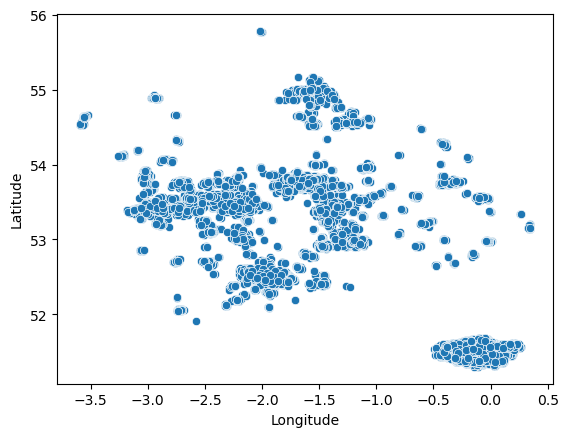

In [302]:
sns.scatterplot(data=df,x='Longitude',y='Latitude')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [303]:
#elpow method
clusters = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_X)
    clusters.append(kmeans.inertia_)
    

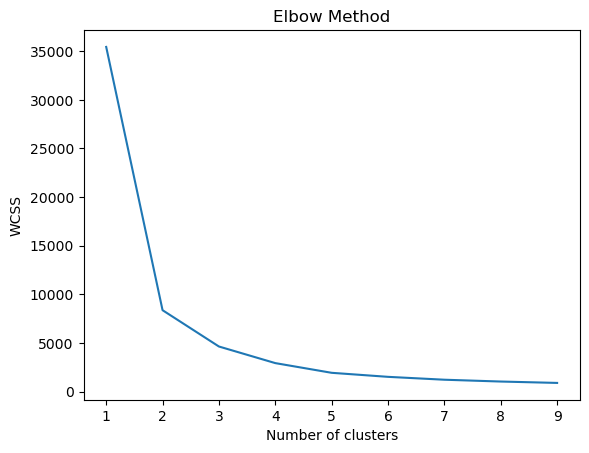

In [304]:
plt.plot(range(1, 10), clusters)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [305]:
#Train the model
K_model=KMeans(n_clusters=2)
K_model.fit(pca_X)

KMeans(n_clusters=2)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [306]:
y_pred=K_model.predict(pca_X)
silhouette_score(X, y_pred)


0.7072406625697835

## Plot the data points with their predicted cluster center

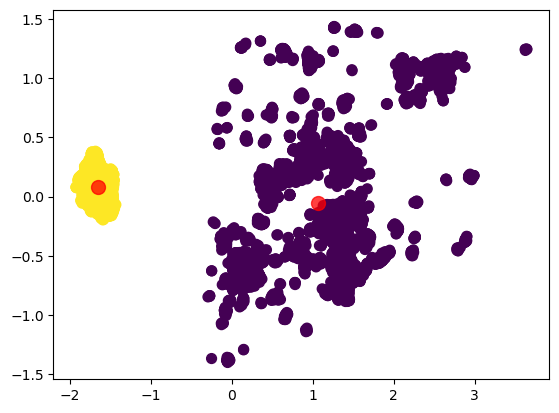

In [308]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_pred, s=50 )

centers = K_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75)  # Mark the centroids
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

-1-PCA Feature 
-2-2 cluster
-3-silhouette_score
-i think the data is very bad and this is the good solution 